In [2]:
import matplotlib
import matplotlib.pyplot as plt
from numpy import linalg as LA
import numpy as np
%matplotlib inline

In [3]:
np.random.exponential?

In [4]:
m = 50
x = np.random.exponential(700, [1,m])
# MLE
1./m*np.sum(x)

636.72541463375615

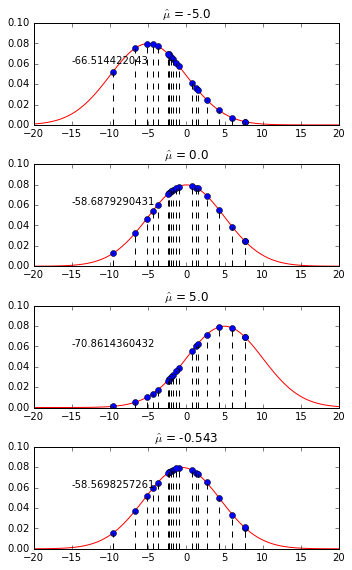

In [214]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (5, 8)
m = 20
mu = 0
sigma = 5.

x = sigma*np.random.randn(1, m)+mu
xp = np.linspace(-20, 20, 100)
y0 = np.zeros((1, m))

mu_ml = np.mean(x)
muhat = np.array([-5., 0., 5., mu_ml])

def normpdf_python(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-1*(x-mu)**2/ (2*sigma**2) )


for i in range(0,4):
    yp = normpdf_python(xp, muhat[i], sigma)
    y = normpdf_python(x, muhat[i], sigma)
    g = np.sum(np.log(y))
    co_x = np.concatenate((x,x))
    co_y = np.concatenate((y0,y))
    
    plt.subplot(4, 1, i+1)
    plt.plot(xp, yp, 'r')
    plt.plot(x, y0, 'k+')
    plt.plot(x, y, 'bo', markerfacecolor = 'b', markersize = 6)
    plt.plot(co_x, co_y, 'k--')
    plt.title('$\hat{\mu}$ = ' + str(round(muhat[i],3)))
    plt.text(-15, 0.06, str(g), fontsize = 10)
    plt.xlim([-20, 20])
    plt.ylim([0, 0.1])
    plt.tight_layout()

0.268765187202


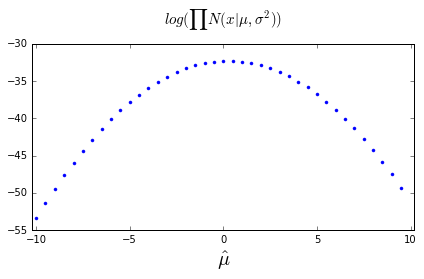

In [36]:
%matplotlib inline

m = 10
mu = 0
sigma = 5

x = sigma*np.random.randn(1, m)+mu

muhat = np.arange(-10, 10, 0.5)
G = np.zeros(np.shape(muhat))


def normpdf_python(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-1*(x-mu)**2/ (2*sigma**2) )

for i in range(np.size(muhat)):
    y = normpdf_python(x, muhat[i], sigma)
    g = np.sum(np.log(y))
    G[i] = g

plt.plot(muhat, G, '.')
plt.xlim([-10.2, 10.2])
plt.xlabel('$\hat{\mu}$', fontsize = 20)
plt.title('$log (\prod{N(x|\mu,\sigma^2)})$', fontsize = 15, y=1.08)
plt.tight_layout()

print (np.mean(x))

2.31794357618


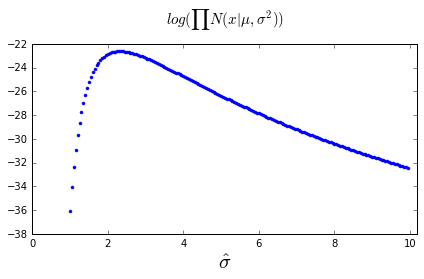

In [211]:
%matplotlib inline

m = 10
mu = 0
sigma = 5

x = sigma*np.random.randn(1, m)+mu

sigmahat = np.arange(1, 10, 0.05)
G = np.zeros(np.shape(sigmahat))


def normpdf_python(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-1*(x-mu)**2/ (2*sigma**2) )

for i in range(np.size(sigmahat)):
    y = normpdf_python(x, mu, sigmahat[i])
    g = np.sum(np.log(y))
    G[i] = g

plt.plot(sigmahat, G, '.')
plt.xlim([0, 10.2])
plt.xlabel('$\hat{\sigma}$', fontsize = 20)
plt.title('$log (\prod{N(x|\mu,\sigma^2)})$', fontsize = 15, y=1.08)
plt.tight_layout()

print (np.sqrt(np.var(x)))

In [207]:
m = 100

a = 1
x = 3 + 2*np.random.rand(m, 1)
#x = np.random.normal(3, 2, (m, 1))
e = 0.1*np.random.randn(m, 1)

y = a*x + e

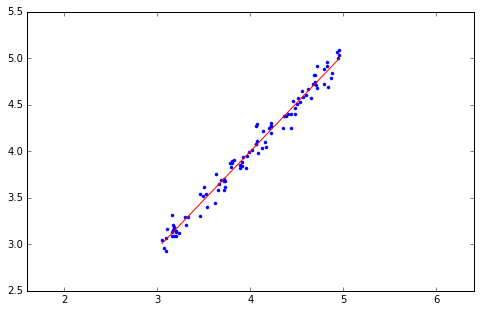

In [187]:
A = np.concatenate((x, np.ones((m,1))), axis = 1)
theta = LA.inv((A.T).dot(A)).dot(A.T).dot(y)

xp = np.linspace(np.min(x), np.max(x), m).T
yp = theta[0]*xp + theta[1]

plt.plot(x, y, 'b.')
plt.plot(xp, yp, 'r')
plt.axis('equal')
plt.show()

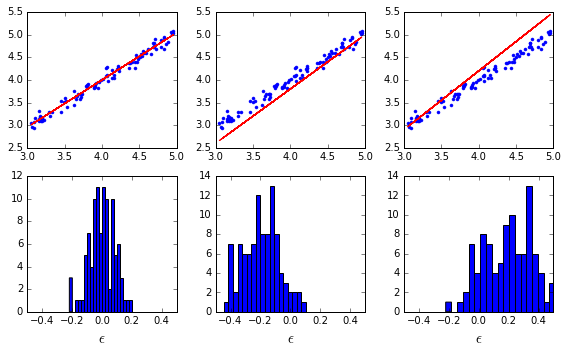

In [188]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 5)

yhat0 = theta[0]*x + theta[1]
error0 = yhat0 - y

yhat1 = 1.2*x - 1
error1 = yhat1 - y

yhat2 = 1.3*x - 1
error2 = yhat2 - y

plt.subplot(2, 3, 1)
plt.plot(x, y, 'b.', x, yhat0, 'r')
plt.subplot(2, 3, 2)
plt.plot(x, y, 'b.', x, yhat1, 'r')
plt.subplot(2, 3, 3)
plt.plot(x, y, 'b.', x, yhat2, 'r')
plt.subplot(2, 3, 4)
plt.hist(error0, 21)
plt.xlabel('$\epsilon$', fontsize = 15)
plt.xlim([-0.5, 0.5])
plt.subplot(2, 3, 5)
plt.hist(error1, 21)
plt.xlabel('$\epsilon$', fontsize = 15)
plt.xlim([-0.5, 0.5])
plt.subplot(2, 3, 6)
plt.hist(error2, 21)
plt.xlabel('$\epsilon$', fontsize = 15)
plt.xlim([-0.5, 0.5])
plt.tight_layout()

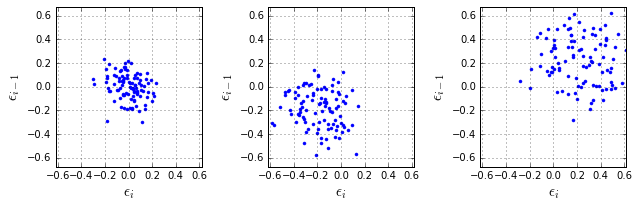

In [78]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (9, 3)


a01 = error0[1:]
a02 = error0[0:-1]

a11 = error1[1:]
a12 = error1[0:-1]

a21 = error2[1:]
a22 = error2[0:-1]

plt.subplot(1, 3, 1)
plt.plot(a01, a02, '.')
plt.axis('equal')
plt.axis([-0.7, 0.7, -0.7, 0.7])
plt.xlabel('$\epsilon_i$', fontsize = 15)
plt.ylabel('$\epsilon_{i-1}$', fontsize = 15)
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(a11, a12, '.')
plt.axis('equal')
plt.axis([-0.7, 0.7, -0.7, 0.7])
plt.xlabel('$\epsilon_i$', fontsize = 15)
plt.ylabel('$\epsilon_{i-1}$', fontsize = 15)
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(a21, a22, '.')
plt.axis('equal')
plt.axis([-0.7, 0.7, -0.7, 0.7])
plt.xlabel('$\epsilon_i$', fontsize = 15)
plt.ylabel('$\epsilon_{i-1}$', fontsize = 15)
plt.grid()

plt.tight_layout()

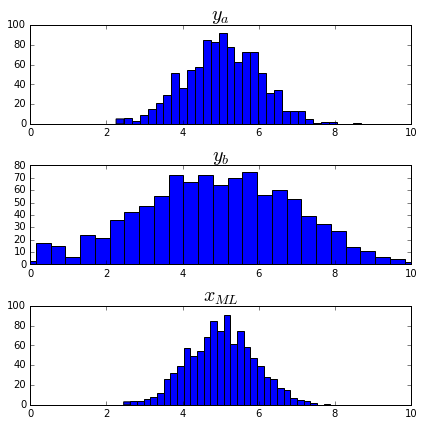

In [177]:
x = 5
a = 1
b = 2

YA = np.zeros((1000, ))
YB = np.zeros((1000, ))
XML = np.zeros((1000, ))

for i in range(0, 1000):
    ya = x + np.random.normal(0, a)
    yb = x + np.random.normal(0, b)
    YA[i] = ya
    YB[i] = yb
    XML[i] = ((1./a**2)*ya + (1./b**2)*yb)/(1./a**2 + 1./b**2)
    
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6, 6)

plt.subplot(3, 1, 1)
plt.hist(YA, 31)
plt.xlim([0, 10])
plt.title('$y_a$', fontsize = 20) 

plt.subplot(3, 1, 2)
plt.hist(YB, 31)
plt.xlim([0, 10])
plt.title('$y_b$', fontsize = 20) 

plt.subplot(3, 1, 3)
plt.hist(XML, 31)
plt.xlim([0, 10])
plt.title('$x_{ML}$', fontsize = 20) 
plt.tight_layout()
plt.show()

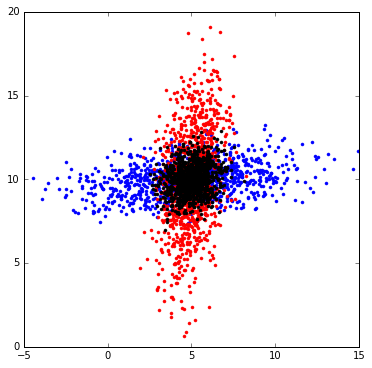

In [159]:
x = np.array([5, 10])
mu = np.array([0, 0])
Ra = np.array([[9, 1], [1, 1]])
Rb = np.array([[1, 1], [1, 9]])

YA = np.zeros((2, 1000))
YB = np.zeros((2, 1000))
XML = np.zeros((2, 1000))

for i in range(0, 1000):
    ya = x + np.random.multivariate_normal(mu, Ra)
    yb = x + np.random.multivariate_normal(mu, Rb)
    XML[:, i] = LA.inv(LA.inv(Ra) + LA.inv(Rb)).dot(LA.inv(Ra).dot(ya) + LA.inv(Rb).dot(yb))
    YA[:, i] = ya
    YB[:, i] = yb
    
plt.plot(YA[0, :], YA[1, :], 'b.')
plt.plot(YB[0, :], YB[1, :], 'r.')
plt.plot(XML[0, :], XML[1, :], 'k.')
plt.axis('equal')
plt.show()

In [212]:
np.random.normal?

In [231]:
mu = 5
theta = np.random.normal(mu, 1)

sigma = 2
x = np.random.normal(theta, sigma)
print (theta, x)

(5.381962781550011, 4.147270152652389)


In [234]:
n = 4.
X = np.random.normal(theta, sigma, n)

xbar = np.mean(X)
theta_MAP = n/(n+sigma**2)*xbar + sigma**2/(n+sigma**2)*mu

print (theta_MAP)

5.04348589651


C:\Users\iSystems\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


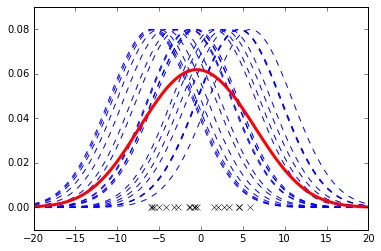

In [268]:
m = 20
mu = 0
sigma = 5

x = np.random.normal(0, 5, (1, m))
xp = np.linspace(-20, 20, 100)
y0 = np.zeros((1, m))

X = np.zeros((m, xp.size))
from scipy.stats import norm
for i in range(m):
    X[i,:] = norm.pdf(xp, x[0, i], sigma)
    
Xnorm = np.sum(X,0)/m
%matplotlib inline
plt.plot(x, y0, 'kx', markerfacecolor = 'k')
plt.plot(xp, X.T, 'b--')
plt.plot(xp, Xnorm, 'r', linewidth = 3)
plt.ylim([-0.01, 0.09])
plt.show()